# Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

import warnings
warnings.filterwarnings('ignore')

In [22]:
df_housing = pd.read_csv('../machine-learning-housing/data/Ames_Housing_Price_Data_cleaned_3.csv')
df_housing = df_housing.drop(['Prop_Addr','mean_LotFrontage','lot_bucket','GarageYrBlt'],axis = 1)
pd.set_option("display.max_columns", None)

df_housing['log_SalePrice']= np.log(df_housing['SalePrice'])

#number of bathrooms 
#turning half baths to .5
df_housing['BsmtHalfBath'] = df_housing['BsmtHalfBath'].replace([1], 0.5)
df_housing['HalfBath'] = df_housing['HalfBath'].replace([1], 0.5)

#adding half bathrooms to full baths
df_housing['BsmtBR'] = df_housing['BsmtHalfBath'] + df_housing['BsmtFullBath']
df_housing['AbvBR'] = df_housing['HalfBath'] + df_housing['FullBath']
df_housing['TotalBR'] = df_housing['AbvBR'] + df_housing['BsmtBR']

df_housing = df_housing.drop(['BsmtHalfBath','BsmtFullBath','HalfBath','FullBath','AbvBR','BsmtBR'], axis = 1)

df_housing.head(5)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,YrSold,lat,long,TotalPorchSF,log_SalePrice,TotalBR
0,909176150,856,126000,30,RL,64.9,7890,Reg,SWISU,1Fam,1Story,6,6,1939,1950,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,0.0,618.0,856.0,TA,Y,SBrkr,856,0,0,2,TA,4,1,Gd,Detchd,Unf,2.0,399.0,TA,TA,Y,0,3,2010,42.017780,-93.651452,166,11.744037,2.0
1,905476230,1049,139500,120,RL,42.0,4235,Reg,Edwards,TwnhsE,1Story,5,5,1984,1984,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,393.0,104.0,1049.0,TA,Y,SBrkr,1049,0,0,2,Gd,5,0,None,Attchd,Fin,1.0,266.0,TA,TA,Y,0,2,2009,42.024697,-93.664186,105,11.845820,3.0
2,905476230,1049,139500,120,RL,42.0,4235,Reg,Edwards,TwnhsE,1Story,5,5,1984,1984,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,393.0,104.0,1049.0,TA,Y,SBrkr,1049,0,0,2,Gd,5,0,None,Attchd,Fin,1.0,266.0,TA,TA,Y,0,2,2009,42.024697,-93.664186,105,11.845820,3.0
3,911128020,1001,124900,30,C (all),60.0,6060,Reg,IDOTRR,1Fam,1Story,5,9,1930,2007,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,0.0,100.0,837.0,Ex,Y,SBrkr,1001,0,0,2,Gd,5,0,None,Detchd,Unf,1.0,216.0,TA,Po,N,154,11,2007,42.021389,-93.614855,128,11.735269,1.0
4,535377150,1039,114000,70,RL,80.0,8146,Reg,OldTown,1Fam,2Story,4,8,1900,2003,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,0.0,405.0,405.0,Gd,Y,SBrkr,717,322,0,2,TA,6,0,None,Detchd,Unf,1.0,281.0,TA,TA,N,0,5,2009,42.038070,-93.612065,279,11.643954,1.0


In [16]:
display(df_housing.describe().round(2))

,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,lat,long,TotalPorchSF,log_SalePrice,TotalBR
count,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00
mean,1482.80,177875.01,57.87,69.55,10089.20,6.04,5.62,1970.32,1983.70,98.77,443.89,53.13,538.50,1035.52,1143.21,335.32,4.26,2.85,6.38,0.60,1.74,465.89,95.89,6.15,2007.84,42.03,-93.64,87.69,12.01,2.21
std,488.84,75776.36,43.09,24.15,8079.42,1.37,1.12,29.68,20.49,176.09,429.32,173.73,424.76,422.13,377.29,422.84,44.26,0.82,1.54,0.65,0.74,207.11,128.87,2.67,1.31,0.02,0.03,106.96,0.39,0.81
min,334.00,12789.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,1.00,2006.00,41.99,-93.69,0.00,9.46,1.00
25%,1107.00,129887.50,20.00,59.60,7386.00,5.00,5.00,1953.00,1965.00,0.00,0.00,0.00,213.75,788.00,868.00,0.00,0.00,2.00,5.00,0.00,1.00,315.75,0.00,4.00,2007.00,42.02,-93.66,0.00,11.77,1.50
50%,1432.00,159000.00,50.00,69.00,9368.50,6.00,5.00,1972.00,1992.00,0.00,384.00,0.00,448.00,976.00,1068.00,0.00,0.00,3.00,6.00,1.00,2.00,474.00,0.00,6.00,2008.00,42.03,-93.64,50.00,11.98,2.00
75%,1728.00,208925.00,70.00,80.00,11475.75,7.00,6.00,1999.00,2003.00,156.00,732.00,0.00,784.00,1262.50,1362.25,702.00,0.00,3.00,7.00,1.00,2.00,576.00,168.00,8.00,2009.00,42.05,-93.62,133.00,12.25,2.50
max,4676.00,755000.00,190.00,408.71,215245.00,10.00,9.00,2010.00,2010.00,1600.00,2288.00,1526.00,2336.00,3206.00,3820.00,1872.00,1064.00,6.00,13.00,4.00,5.00,1488.00,1424.00,12.00,2010.00,42.06,-93.58,1207.00,13.53,8.00


In [6]:
'Finding the Skewness and Kurtosis of feature skewness measures lack of symmetry, kurtosis measures if data is heavy or long tailed'

print("Skewness: %f" %df_housing['SalePrice'].skew())
print("Kurtosis: %f" %df_housing['SalePrice'].kurt())

Skewness: 1.814685
Kurtosis: 5.653153


In [5]:
df_housing.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(5)

,SalePrice
SalePrice,1.000000
OverallQual,0.791702
GrLivArea,0.721227
TotalBsmtSF,0.659358
1stFlrSF,0.647255


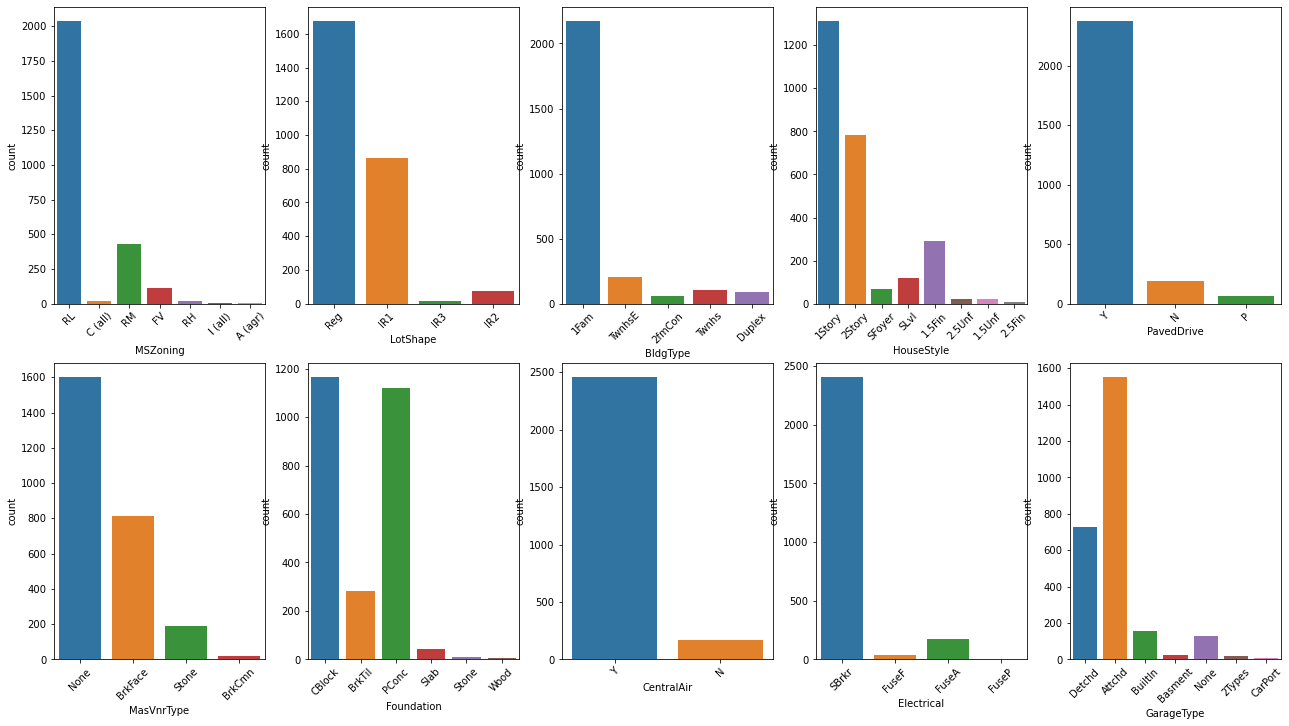

In [6]:
categorical = ['MSZoning', 'LotShape', 'BldgType','HouseStyle', 'PavedDrive',
                'MasVnrType','Foundation','CentralAir', 
                 'Electrical','GarageType', 'GarageFinish', 'Exterior1st']

#categorical variables and their counts
fig, ax = plt.subplots(2, 5, figsize=(22, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

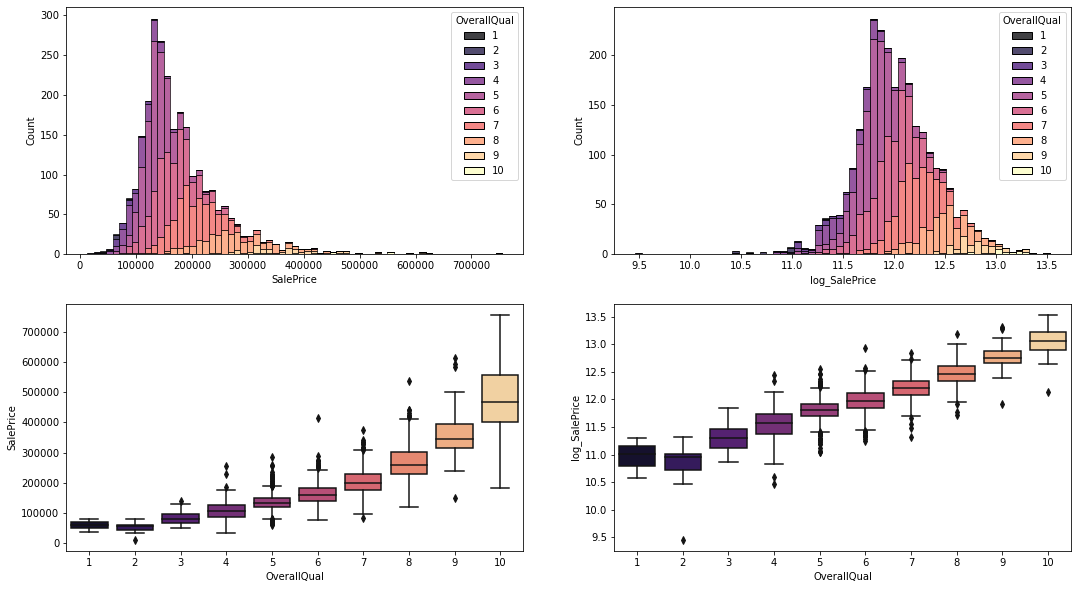

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_housing, palette = "magma", ax = ax[1,0])
sns.boxplot(x='OverallQual', y='log_SalePrice', data=df_housing,palette = "magma", ax = ax[1,1])
sns.histplot(df_housing,x='log_SalePrice', stat='count', hue='OverallQual',palette = "magma", multiple='stack', ax = ax[0,1])
sns.histplot(df_housing,x='SalePrice', stat='count', hue='OverallQual', palette = "magma", multiple='stack', ax = ax[0,0])

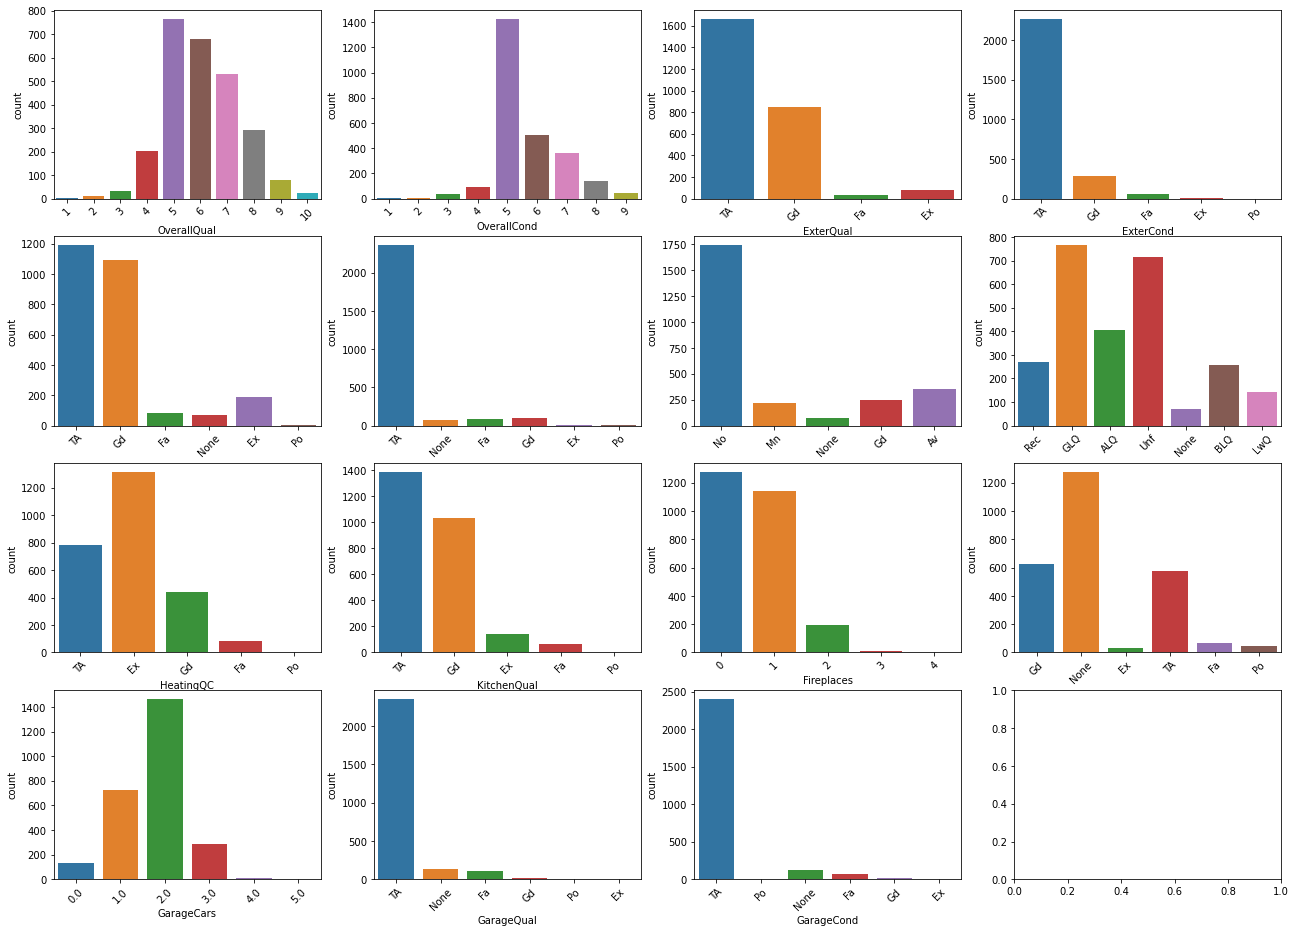

In [7]:
ordinal = ['OverallQual', 'OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','HeatingQC','KitchenQual','Fireplaces',
                'FireplaceQu','GarageCars', 'GarageQual', 'GarageCond']

#ordinal variables and their counts
fig, ax = plt.subplots(4, 4, figsize=(22, 16))
for variable, subplot in zip(ordinal, ax.flatten()):
    sns.countplot(df_housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

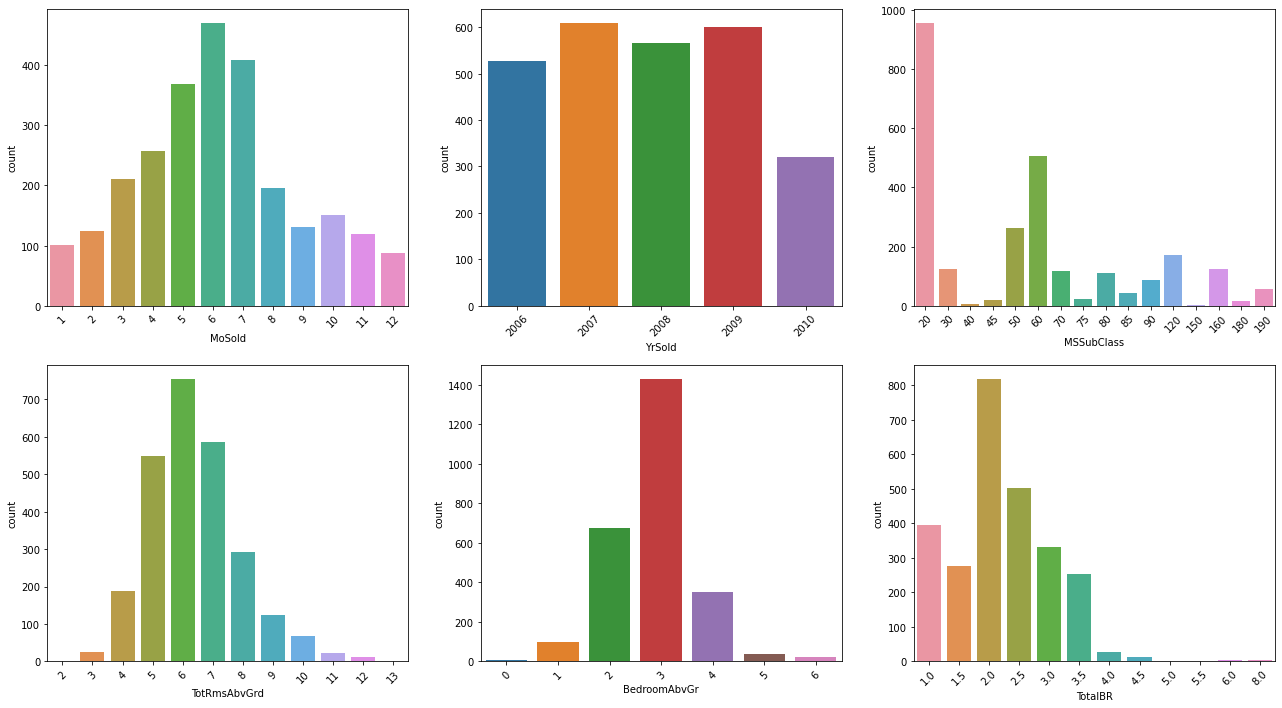

In [15]:
ordinal2 = ['MoSold', 'YrSold', 'MSSubClass', 'TotRmsAbvGrd','BedroomAbvGr','TotalBR']

#ordinal2 variables and their counts
fig, ax = plt.subplots(2, 3, figsize=(22, 12))
for variable, subplot in zip(ordinal2, ax.flatten()):
    sns.countplot(df_housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

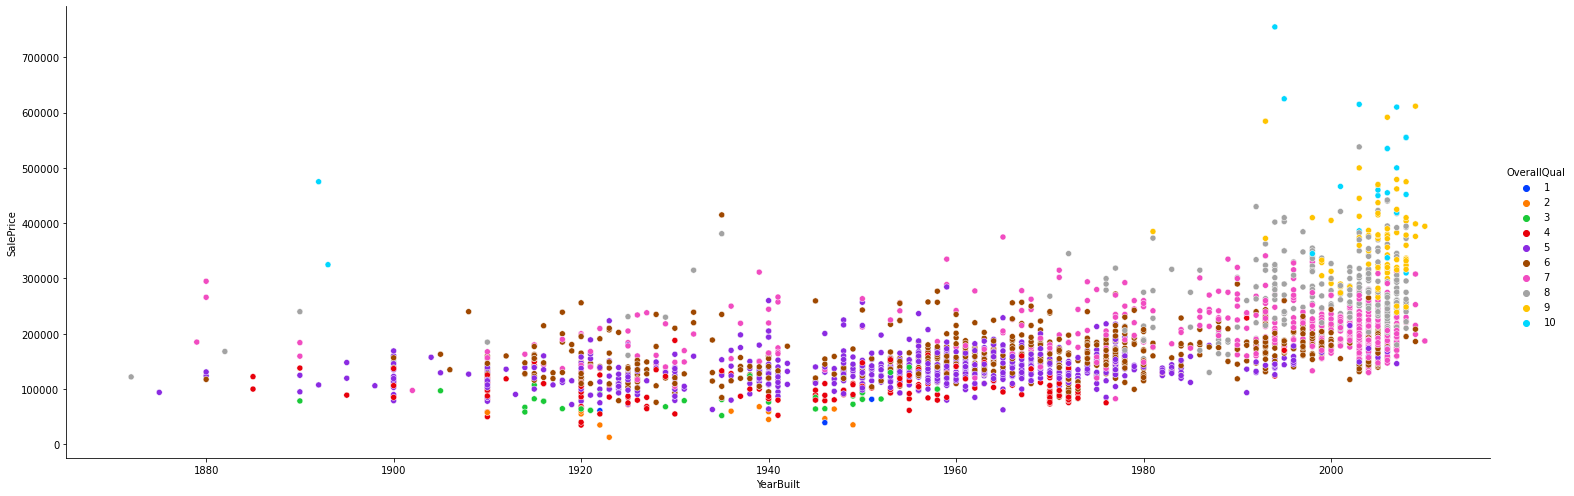

In [9]:
sns.relplot(data=df_housing, x='YearBuilt', y='SalePrice', kind='scatter',
            height=7, aspect=3, hue='OverallQual', palette='bright',legend = 'full')

Text(0.5, 1.0, 'Sale Price of Different Quality Houses by Year')

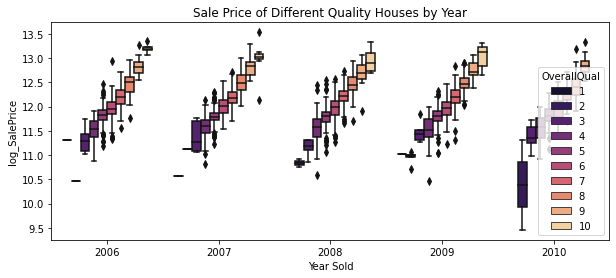

In [18]:
#Did houses of the same quality get priced differently throughout the years?
plt.figure(figsize=(10,4))
ax = sns.boxplot(x="YrSold", y="log_SalePrice", hue="OverallQual", data=df_housing, palette = "magma")
ax.set_xlabel('Year Sold')
ax.set_title('Sale Price of Different Quality Houses by Year')

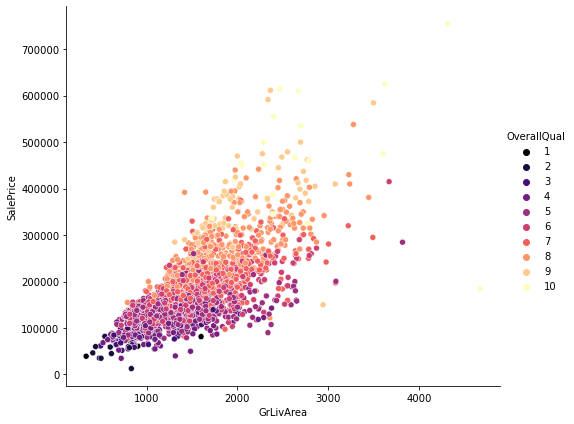

In [19]:
sns.relplot(data=df_housing, x='GrLivArea', y='SalePrice', kind='scatter',
            height=6, aspect=1.2, hue='OverallQual', palette='magma', legend = 'full')

#### Neighborhoods

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

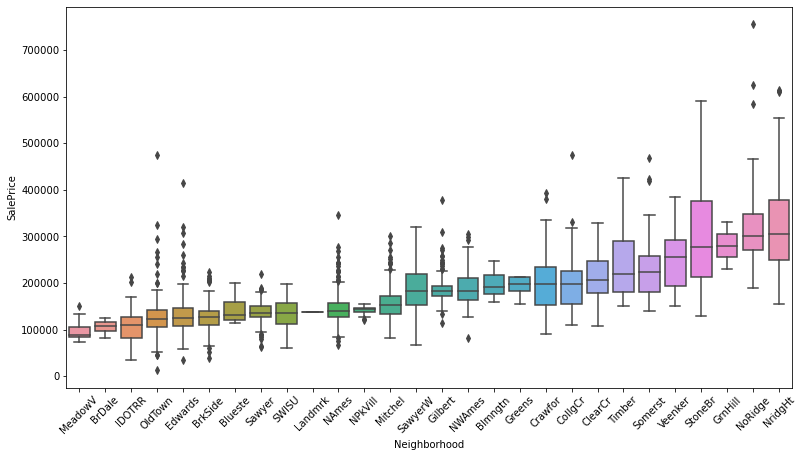

In [20]:
#neighborhoods
plt.figure(figsize=(13,7))
plt.xticks(rotation=45)
sorted_nb = df_housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=df_housing['Neighborhood'], y=df_housing['SalePrice'], order=list(sorted_nb.index))

In [24]:
df_agg = df_housing.groupby(['Neighborhood']).agg({'PID': ['count']}).reset_index()
df_agg.columns = ['Neighborhood', 'count']
df_agg.sort_values('count', ascending = False).head(5)

,Neighborhood,count
15,NAmes,417
5,CollgCr,240
20,OldTown,217
7,Edwards,169
24,Somerst,145


### Cleaning, formatting, & adding variables

In [7]:
#dropping columns 
#df_cars = df_cars.drop('name',axis=1)

In [8]:
#Creating Sale_Price Categories
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000]
SalePrice_labels = ['<$100k','100k','200k','300k','400k','500k','600k','700k']

df_merged['salebin'] = pd.cut(df_merged['SalePrice'], bins = bins, labels = SalePrice_labels)
df_merged['salebin']
#df_merged['SaleBin'].unique()

0       100k
1       100k
2       100k
3       100k
4       100k
        ... 
2619    100k
2620    100k
2621    100k
2622    200k
2623    200k
Name: salebin, Length: 2624, dtype: category
Categories (8, object): ['<$100k' < '100k' < '200k' < '300k' < '400k' < '500k' < '600k' < '700k']

In [29]:
#adding variables
#price per sq ft 

df_merged['price_per_sqft'] = round(df_merged['SalePrice']/(df_merged['1stFlrSF'] + df_merged['2ndFlrSF'] ), 2)

p_sqft = df_merged['price_per_sqft']
pmax, pmin = p_sqft.max(), p_sqft.min()
bin_size = (pmax - pmin)/8

price_sfqft_bins = list(range(int(pmin), int(pmax), int(bin_size)))
price_sfqft_bins = [5*round(price/5) for price in price_sfqft_bins]
price_sfqft_labels = ['$15 - 45', '80', '110', '145', '175', '205', '240', '270']

#price per sq ft bins 
df_merged['price_sqft_bin'] = pd.cut(df_merged['price_per_sqft'], bins = price_sfqft_bins, labels = price_sfqft_labels)

#print("$ per sqft max:", pmax)
#print("$ per sqft min:", pmin)
#bin_size 

In [10]:
df_merged['price_sqft_bin']

0       175
1       145
2       145
3       145
4       110
       ... 
2619    145
2620    110
2621     80
2622    145
2623    145
Name: price_sqft_bin, Length: 2624, dtype: category
Categories (8, object): ['$15 - 45' < '80' < '110' < '145' < '175' < '205' < '240' < '270']

### Statistics Snapshot

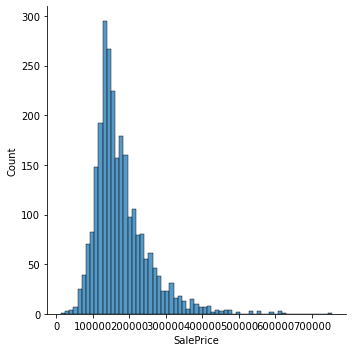

In [11]:
#Univariate Analysis- Univariate Analysis: “Uni” +“Variate”  Univariate, means one variable or feature analysis. The univariate analysis basically tells us how data in each feature is distributed. just sample as below.
sns_plot = sns.displot(df_merged["SalePrice"])

In [12]:
df_merged.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(10)

,SalePrice
SalePrice,1.000000
OverallQual,0.791702
GrLivArea,0.721227
TotalBsmtSF,0.659358
1stFlrSF,0.647255
GarageCars,0.638052
GarageArea,0.631373
price_per_sqft,0.579709
YearBuilt,0.542728
FullBath,0.533422


In [13]:
#df_merged['SaleBin'] = pd.cut(df_merged['SalePrice'], bins = (list(range(0,1500000,100000))))

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

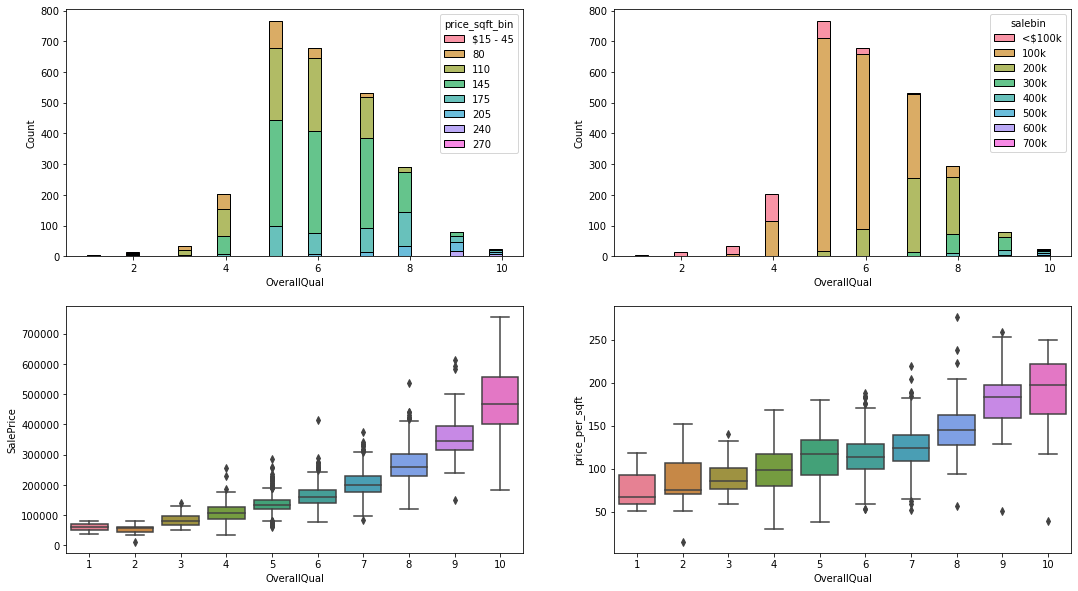

In [31]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_merged,palette = "husl", ax = ax[1,0])
sns.boxplot(x='OverallQual', y='price_per_sqft', data=df_merged, palette = "husl",ax = ax[1,1])
sns.histplot(df_merged,x='OverallQual', stat='count', hue='salebin', multiple='stack', palette = "husl", ax = ax[0,1])
sns.histplot(df_merged,x='OverallQual', stat='count', hue='price_sqft_bin', palette = "husl", multiple='stack', ax = ax[0,0])


#sns.histplot(df_merged['OverallQual'], ax = ax[0,1])

# sns.histplot(df_merged['SalePrice'], ax = ax[0,1])
# sns.boxplot(x= df_merged["OverallQual"], ax = ax[1,0])
# sns.histplot(df_merged['OverallQual'], ax = ax[1,1])
# sns.boxplot(x= df_merged["GrLivArea"], ax = ax[2,0])
# sns.histplot(df_merged['GrLivArea'], ax = ax[2,1])
# sns.boxplot(x= df_merged["TotalBsmtSF"], ax = ax[3,0])
# sns.histplot(df_merged['TotalBsmtSF'], ax = ax[3,1])


#df_merged.[]pd.cut

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

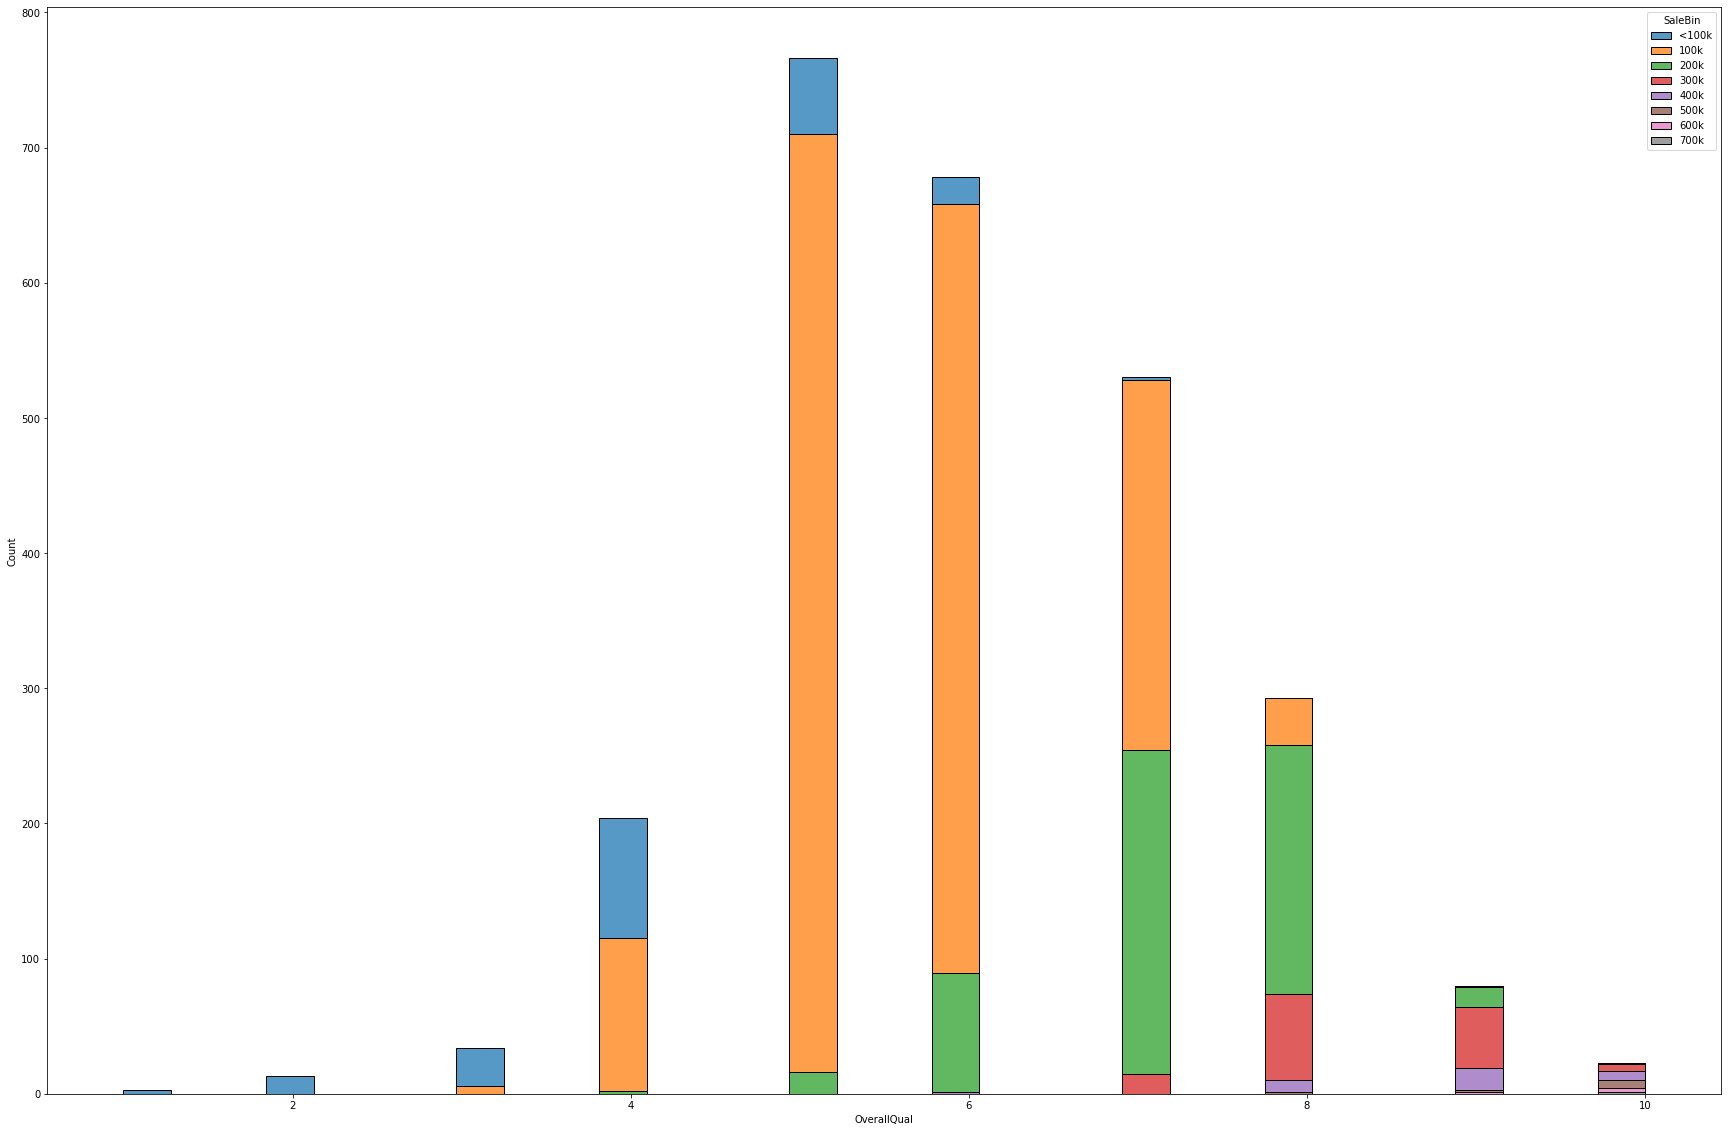

In [304]:
sns.histplot(data=df_merged,x='OverallQual', stat='count', hue='SaleBin', multiple='stack')

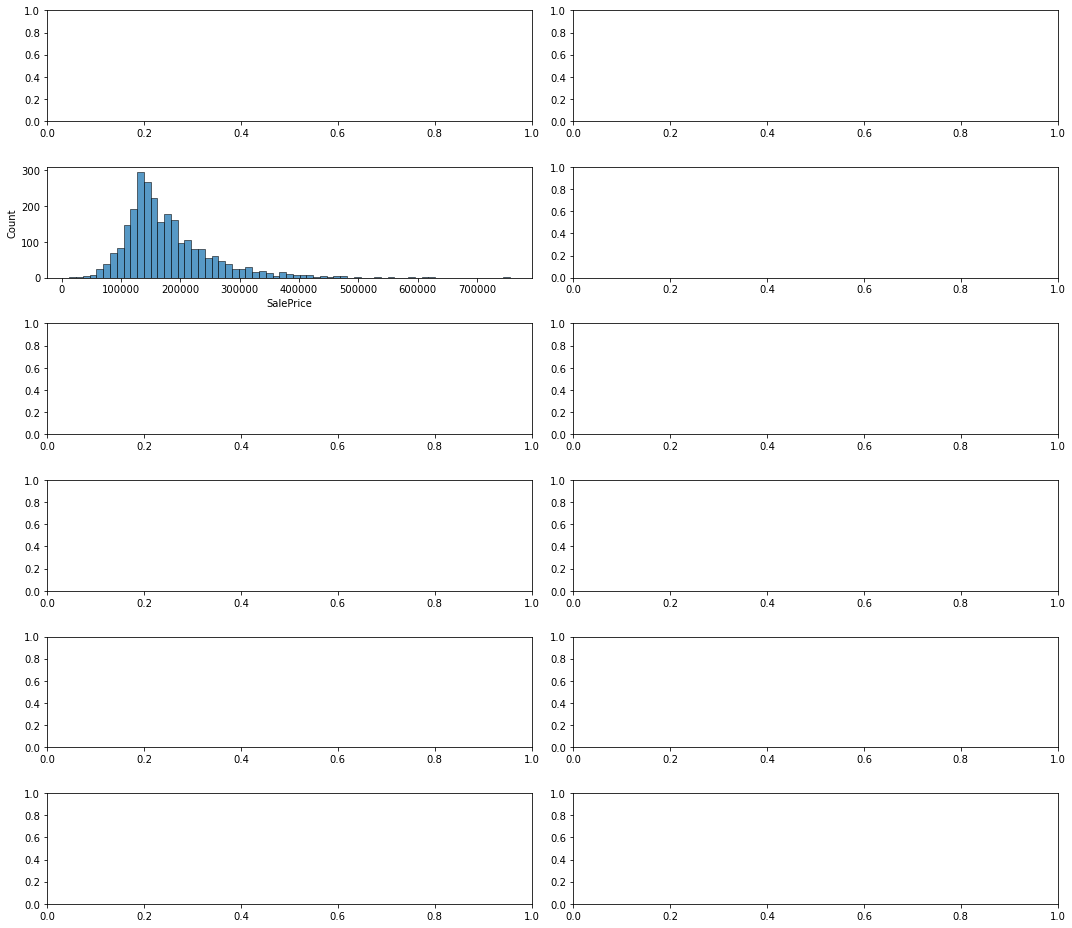

In [244]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
# sns.boxplot(x= df_merged["SalePrice"], ax = ax[0,0])
sns.histplot(df_merged['SalePrice'], ax = ax[1,0])
# sns.boxplot(x= df_merged["OverallQual"], ax = ax[1,0])

                                               
# sns.histplot(df_merged['OverallQual'], ax = ax[1,1])
# sns.boxplot(x= df_merged["GrLivArea"], ax = ax[2,0])
# sns.histplot(df_merged['GrLivArea'], ax = ax[2,1])
# sns.boxplot(x= df_merged["TotalBsmtSF"], ax = ax[3,0])
# sns.histplot(df_merged['TotalBsmtSF'], ax = ax[3,1])
# # sns.boxplot(x= df_merged["weight"], ax = ax[4,0])
# sns.distplot(df_merged['weight'], ax = ax[4,1])
# sns.boxplot(x= df_merged["acceleration"], ax = ax[5,0])
# sns.distplot(df_merged['acceleration'], ax = ax[5,1])
plt.tight_layout()

In [177]:
numerical_columns = ['GrLivArea', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 
                    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                    '2ndFlrSF', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea']

categorical_columns = ['MsSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType',
                      'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                      'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                      'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                      'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
                      'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
                      'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
                      'SaleCondition']

In [28]:
df_merged.groupby(['Neighborhood_x']).sum().head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,PID,GrLivArea,SalePrice_x,MSSubClass,LotFrontage,LotArea_x,OverallQual,...,GarageArea_y,YrSold_YYYY,MoSold_MM,SalePrice_y,PA-Nmbr,PA-PostD,NmbrBRs,lat,long,distToUni
Neighborhood_x,,,,,,,,,,,,,,,,,,,,,
Blmngtn,27767,27322,12077,12149253525,32614,4513455,2460,1004.100000,78171,164,...,11193.0,12109.0,42.0,1542500.0,60013.0,0.0,44.0,967.382015,-2153.701517,53.59
Blueste,12849,12641,4834,9094522890,11597,1435900,1480,273.000000,23465,66,...,4852.0,10090.0,37.0,836000.0,15055.0,0.0,19.0,420.111554,-936.450688,10.80
BrDale,41454,40785,12645,15823528440,33226,3194750,4800,645.000000,55219,172,...,9024.0,28247.0,80.0,1802500.0,41406.0,0.0,76.0,1261.568310,-2808.851179,60.00
BrkSide,137022,134792,46752,88406162375,128781,13116075,5080,5882.500000,725958,535,...,34476.0,48447.0,147.0,3832101.0,112696.0,0.0,274.0,4370.936970,-9737.515850,90.48
ClearCr,52306,51452,13871,36220060279,71087,8559232,2020,3948.237589,1043763,240,...,20274.0,16146.0,50.0,2078300.0,98207.0,0.0,106.0,1682.399720,-3745.130520,99.20


### Exploratory Data Analysis

In [167]:
#plt.rcParams["figure.figsize"] = (30,20)`

In [168]:
def boxplot_sorted(df, by, column, group, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return sns.boxplot(x=by, y=column, data=df, hue=group, order= meds.index)

<AxesSubplot:xlabel='Neighborhood_x', ylabel='SalePrice_x'>

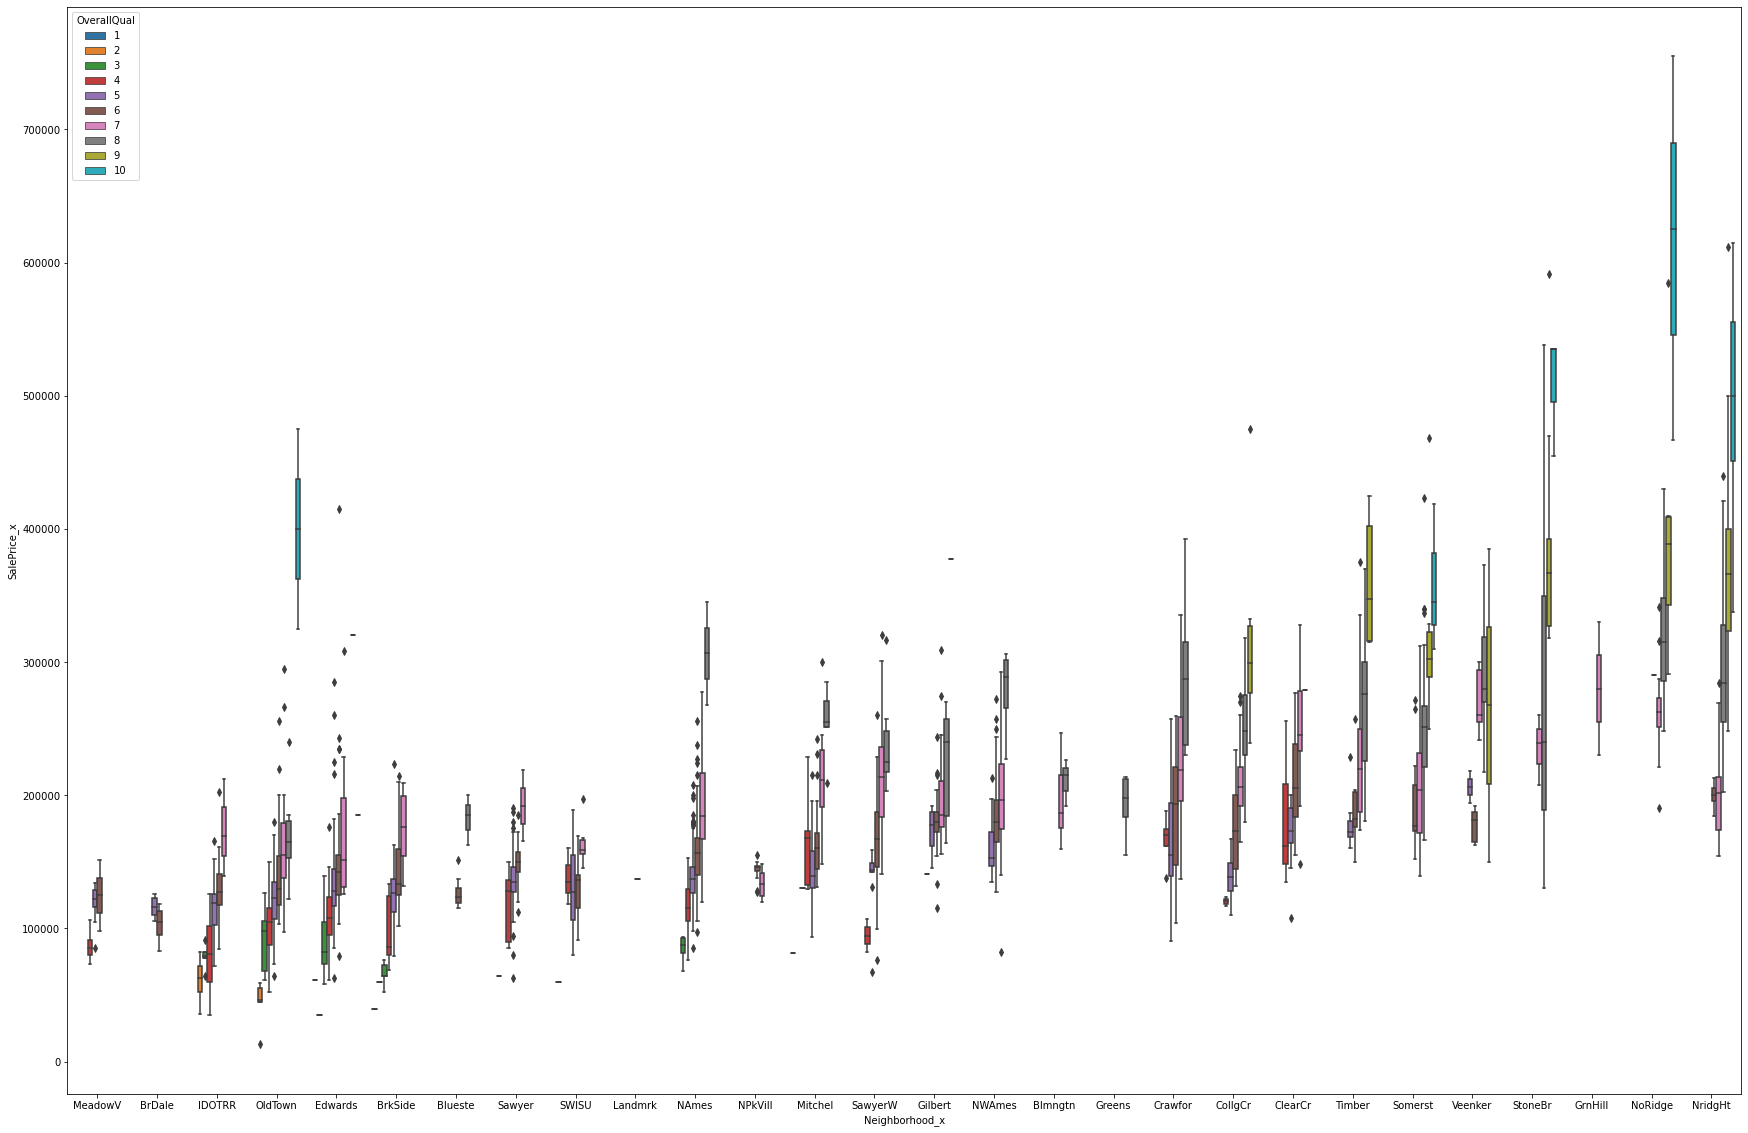

In [166]:
boxplot_sorted(df_merged,'Neighborhood_x', 'SalePrice_x','OverallQual', rot=0)

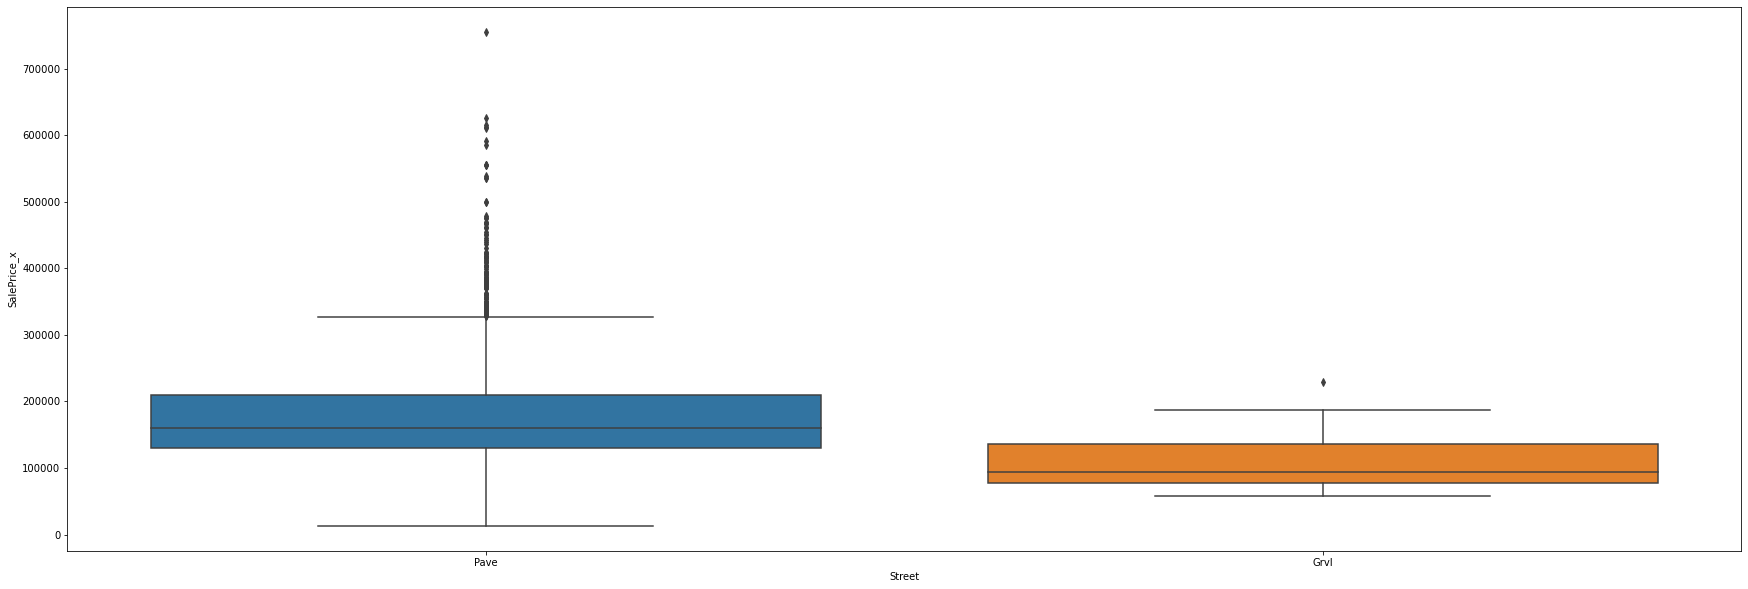

In [159]:
boxplot_sorted(df_merged, "", 'SalePrice_x','Neighborhood_x' rot=0)

In [83]:
#Dividing lot area into bins of interval size of 1000. (Max - min)/1000 = 214 bins
df_small['lot_bucket'] = pd.cut(df_small['LotArea'],214)

mean_lf = df_small.groupby('lot_bucket').agg({'LotFrontage': np.mean}, ignorena = True)
data_new = pd.merge(df_small, mean_lf, on = 'lot_bucket', how = 'left')
data_new.rename(columns = {'LotFrontage_x':'LotFrontage', 'LotFrontage_y':'mean_LotFrontage'}, inplace = True)
# data_new

In [5]:
# data_new = pd.merge(data, mean_lf, on = 'lot_bucket', how = 'left')
# data_new.rename(columns = {'LotFrontage_x':'LotFrontage', 'LotFrontage_y':'mean_LotFrontage'}, inplace = True)
# data_new.apply(lambda x: print(x['mean_LotFrontage']) if x['LotFrontage'].isna() == True else x['LotFrontage'])
# data_new

(2.0, 320.0)

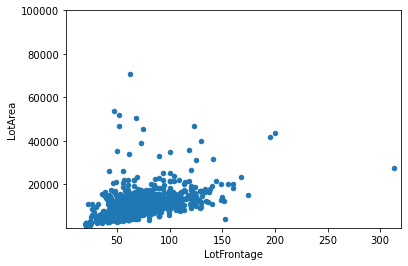

In [6]:
scatterp = df_small.plot.scatter(x='LotFrontage',y='LotArea', colormap='viridis')
scatterp.set_ylim(2,100000)
scatterp.set_xlim(2,320)

In [12]:
df_merged = df_small_cleaned.merge(df_big, left_on='PID', right_on='MapRefNo', how='left')
df_merged.to_csv('merged_data.csv')
len(df_merged)

2624

In [8]:
#df_merged[df_merged.duplicated(['PID'], keep=False)].head(5) 

In [14]:
#df_merged.sort_values('PID', ascending=True)

In [25]:
df_cleaned = pd.read_csv('../nicole/Ames_Housing_Price_Data_cleaned.csv')

In [26]:
#df_cleaned.shape
df_cleaned.head()
#df_cleaned.columns

,Unnamed: 0,Unnamed: 0.1,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lot_bucket,mean_LotFrontage
0,0,1,909176150,856,126000,30,RL,64.9,7890,Pave,...,None,None,None,0,3,2010,WD,Normal,"(7298.458, 8298.201]",64.939130
1,1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,...,None,None,None,0,2,2009,WD,Normal,"(3299.486, 4299.229]",46.154930
2,2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,...,None,None,None,0,11,2007,WD,Normal,"(5298.972, 6298.715]",54.060150
3,3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,...,None,None,None,0,5,2009,WD,Normal,"(7298.458, 8298.201]",64.939130
4,4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,...,None,None,None,0,11,2009,WD,Normal,"(8298.201, 9297.944]",68.724832


In [44]:
df_cleaned.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

PID                 2579
GrLivArea           1213
SalePrice            870
MSSubClass            16
MSZoning               7
                    ... 
YrSold                 5
SaleType              10
SaleCondition          6
lot_bucket            52
mean_LotFrontage      43
Length: 83, dtype: int64